<a href="https://colab.research.google.com/github/Zafar-Lab/scDREAMER/blob/main/2109_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%tensorflow_version 1.x

In [2]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import warnings
warnings.filterwarnings('ignore')
"""
!pip install -U scipy==1.5.0
!pip install scanpy==1.8.2
!pip install -U scikit-learn
"""

'\n!pip install -U scipy==1.5.0\n!pip install scanpy==1.8.2\n!pip install -U scikit-learn\n'

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
import os
import numpy as np

In [6]:
tf.enable_eager_execution()
np.random.seed(0)
tf.set_random_seed(0)

W1119 18:54:13.683906 140476239061824 module_wrapper.py:139] From /tmp/ipykernel_1884129/734876430.py:1: The name tf.enable_eager_execution is deprecated. Please use tf.compat.v1.enable_eager_execution instead.

W1119 18:54:13.685586 140476239061824 module_wrapper.py:139] From /tmp/ipykernel_1884129/734876430.py:3: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



Building model

In [7]:
import os
print (os.getcwd())

/home/ajita/Documents/data_integration/scDREAMER/scDREAMER


In [8]:
data_path = "/home/ajita/Documents/data_integration/Lung/Lung_atlas_public.h5ad"
#data_path = "/home/ajita/Documents/data_integration/Pan/Pancreas.h5ad"
#data_path = "/home/ajita/Documents/data_integration/hum_mou/hcl_mca_merged.h5ad"
#data_path = "/home/ajita/Documents/data_integration/Lung/Lung_wrong_label_10.h5ad" # 0.2.
data_path = "/home/ajita/Documents/data_integration/Immune/Immune_Human_wrong_label_10.h5ad" 


In [9]:
name = "Immune_Human"

batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation_wrong', # for _immune human wrong label
                 'Lung' : 'cell_type_wrong', # for lung _wrong labels
                 'Pancreas' : 'celltype',
                 'Human_Mouse' : "celltype",
                 "Human_Retina":"Subcluster"
                    }   
"""
our_method_emb_dic = {'Immune_Human' : 'Immune_Human_case2_latent_matrix_c_300',
                 'Lung' : 'Lung_case2_latent_matrix_c_300',
                 'Pancreas' : 'Pancreas_case2_latent_matrix_c_250',
                 'Human_Retina': "retina_case2_latent_matrix_c_300"    
                }  
"""

our_method_emb_dic = {'Immune_Human' : 'Immune_Human_latent_matrix_c_299_so_Dis',
                 'Lung' : 'Lung_case2_latent_matrix_c_300',
                 'Pancreas' : 'Pancreas_case2_latent_matrix_c_250',
                 'Human_Retina': "retina_case2_latent_matrix_c_300"    
                }  


W1119 18:54:14.406063 140476239061824 module_wrapper.py:139] From /tmp/ipykernel_1884129/1945523224.py:10: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1119 18:54:14.407510 140476239061824 module_wrapper.py:139] From /tmp/ipykernel_1884129/1945523224.py:15: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2022-11-19 18:54:14.409214: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-11-19 18:54:14.446681: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2022-11-19 18:54:14.456922: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5630b2494bf0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-11-19 18:54:14.456969: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-

came in load_gene
updated hvg


W1119 18:54:33.949950 140476239061824 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi.py:9: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1119 18:54:33.957223 140476239061824 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi.py:274: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1119 18:54:33.958293 140476239061824 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils_new.py:18: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W1119 18:54:33.958928 140476239061824 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://gi

here [ 2  4 12 ...  1  2  2]
Shape self.data_train: (33506, 2000)
Shape self.data_test: (33506, 2000)
encoder input shape  Tensor("concat:0", shape=(?, 2010), dtype=float32)


W1119 18:54:34.196241 140476239061824 deprecation.py:506] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi.py:303: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W1119 18:54:34.315185 140476239061824 deprecation.py:323] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi.py:43: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W1119 18:54:34.317368 140476239061824 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi.py:614: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



decoder input shape  Tensor("concat_2:0", shape=(?, 20), dtype=float32)


W1119 18:54:34.609386 140476239061824 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils_new.py:41: The name tf.log is deprecated. Please use tf.math.log instead.

W1119 18:54:34.618056 140476239061824 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils_new.py:41: The name tf.lgamma is deprecated. Please use tf.math.lgamma instead.

W1119 18:54:34.657601 140476239061824 deprecation.py:323] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi.py:131: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

W1119 18:54:34.709713 140476239061824 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAME

entering in for loop 1   512  -- > 256
No of cell types 16
classifier logit is:  Tensor("classifier/matmul_1:0", shape=(?, 16), dtype=float32)
u is:  Tensor("sample_gaussian_3/random_normal:0", shape=(?, 6), dtype=float32)
z is:  Tensor("sample_gaussian/random_normal:0", shape=(?, 10), dtype=float32)
KL gaussian z Tensor("mul_13:0", shape=(?,), dtype=float32)
KL gaussian l Tensor("mul_12:0", shape=(?,), dtype=float32)


W1119 18:54:34.747366 140476239061824 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi.py:163: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W1119 18:54:34.777451 140476239061824 deprecation.py:323] From /home/ajita/anaconda3/envs/tf1_dra/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Cluster DRA on DataSet /home/ajita/Documents/data_integration/Immune/Immune_Human_wrong_label_10.h5ad ... 


W1119 18:54:36.567869 140476239061824 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi.py:179: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.



Epoch : [0] ,  a_loss = 384.8245, d_loss: -0.5977 , db_loss: 2.1972
Epoch : [1] ,  a_loss = 342.8502, d_loss: -0.0150 , db_loss: 3.1641
Epoch : [2] ,  a_loss = 455.5984, d_loss: -0.0318 , db_loss: 0.9760
Epoch : [3] ,  a_loss = 377.8816, d_loss: -0.3047 , db_loss: 2.6442
Epoch : [4] ,  a_loss = 335.8497, d_loss: -0.1454 , db_loss: 1.6628
Epoch : [5] ,  a_loss = 327.6184, d_loss: -0.3394 , db_loss: 2.6897
Epoch : [6] ,  a_loss = 448.8001, d_loss: -0.0149 , db_loss: 1.0573
Epoch : [7] ,  a_loss = 327.1897, d_loss: -0.0298 , db_loss: 1.9022
Epoch : [8] ,  a_loss = 420.9448, d_loss: -0.1191 , db_loss: 0.9562
Epoch : [9] ,  a_loss = 403.9272, d_loss: -0.0051 , db_loss: 1.2860
Epoch : [10] ,  a_loss = 353.0942, d_loss: -0.0054 , db_loss: 1.9302
Epoch : [11] ,  a_loss = 321.8410, d_loss: -0.0072 , db_loss: 1.9214
Epoch : [12] ,  a_loss = 389.9791, d_loss: -0.0045 , db_loss: 1.4547
Epoch : [13] ,  a_loss = 380.4920, d_loss: -0.0051 , db_loss: 0.6845
Epoch : [14] ,  a_loss = 433.9580, d_loss: -

Epoch : [119] ,  a_loss = 277.7358, d_loss: -1.7843 , db_loss: 2.0147
Epoch : [120] ,  a_loss = 379.7674, d_loss: -1.2244 , db_loss: 0.9938
Epoch : [121] ,  a_loss = 394.0920, d_loss: -1.1960 , db_loss: 0.9714
Epoch : [122] ,  a_loss = 263.9758, d_loss: -0.9622 , db_loss: 2.7027
Epoch : [123] ,  a_loss = 386.6166, d_loss: -0.8232 , db_loss: 1.0590
Epoch : [124] ,  a_loss = 383.5713, d_loss: -0.8830 , db_loss: 1.2011
Epoch : [125] ,  a_loss = 309.4517, d_loss: -0.7876 , db_loss: 2.4260
Epoch : [126] ,  a_loss = 268.8130, d_loss: -0.7271 , db_loss: 2.3421
Epoch : [127] ,  a_loss = 385.9684, d_loss: -0.7651 , db_loss: 1.1356
Epoch : [128] ,  a_loss = 286.3690, d_loss: -0.8062 , db_loss: 2.1784
Epoch : [129] ,  a_loss = 336.2992, d_loss: -0.7539 , db_loss: 1.2363
Epoch : [130] ,  a_loss = 383.8268, d_loss: -0.7995 , db_loss: 0.7695
Epoch : [131] ,  a_loss = 285.0239, d_loss: -0.7134 , db_loss: 1.7272
Epoch : [132] ,  a_loss = 385.6087, d_loss: -0.7618 , db_loss: 1.1319
Epoch : [133] ,  a_l

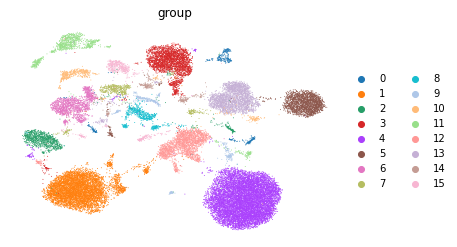

None


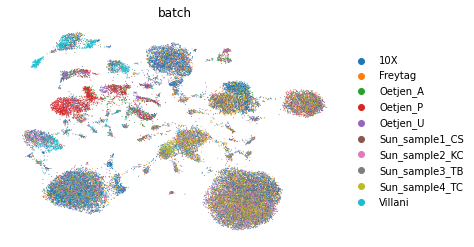

None
Computing NMI ...
Done !
NMI = 0.7997418380935376
Epoch : [201] ,  a_loss = 300.9247, d_loss: -2.0360 , db_loss: 2.1134
Epoch : [202] ,  a_loss = 297.0876, d_loss: -1.6325 , db_loss: 1.9076
Epoch : [203] ,  a_loss = 318.0699, d_loss: -2.8829 , db_loss: 2.2137
Epoch : [204] ,  a_loss = 266.5400, d_loss: -2.2630 , db_loss: 2.4793
Epoch : [205] ,  a_loss = 264.6718, d_loss: -1.6942 , db_loss: 2.4702
Epoch : [206] ,  a_loss = 302.2448, d_loss: -1.7426 , db_loss: 2.0642
Epoch : [207] ,  a_loss = 380.3795, d_loss: -1.8669 , db_loss: 1.0193
Epoch : [208] ,  a_loss = 380.8185, d_loss: -0.9584 , db_loss: 0.9504
Epoch : [209] ,  a_loss = 290.4649, d_loss: -1.3768 , db_loss: 3.0294
Epoch : [210] ,  a_loss = 297.0329, d_loss: -1.8415 , db_loss: 2.3327
Epoch : [211] ,  a_loss = 386.6896, d_loss: -1.8571 , db_loss: 0.8798
Epoch : [212] ,  a_loss = 374.3150, d_loss: -1.6167 , db_loss: 0.9218
Epoch : [213] ,  a_loss = 318.7936, d_loss: -2.3458 , db_loss: 1.9604
Epoch : [214] ,  a_loss = 330.8164,

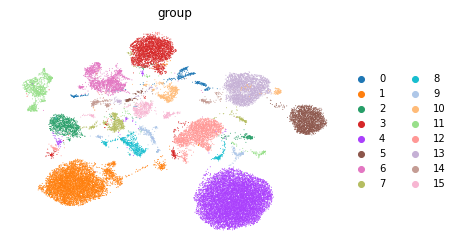

None


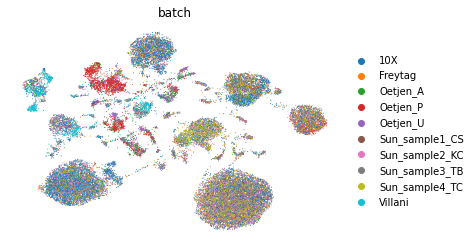

None
Computing NMI ...
Done !
NMI = 0.8134703339900916
Epoch : [251] ,  a_loss = 380.3313, d_loss: -1.6506 , db_loss: 0.8996
Epoch : [252] ,  a_loss = 294.0436, d_loss: -1.4127 , db_loss: 2.4370
Epoch : [253] ,  a_loss = 386.8406, d_loss: -1.4477 , db_loss: 1.0359
Epoch : [254] ,  a_loss = 274.0519, d_loss: -2.3733 , db_loss: 2.8427
Epoch : [255] ,  a_loss = 305.8171, d_loss: -1.0651 , db_loss: 1.7624
Epoch : [256] ,  a_loss = 321.7885, d_loss: -1.6166 , db_loss: 2.4568
Epoch : [257] ,  a_loss = 276.9706, d_loss: -2.3241 , db_loss: 2.1779
Epoch : [258] ,  a_loss = 266.5204, d_loss: -1.3857 , db_loss: 2.0116
Epoch : [259] ,  a_loss = 290.7307, d_loss: -1.3894 , db_loss: 2.3072
Epoch : [260] ,  a_loss = 270.1078, d_loss: -0.6891 , db_loss: 2.0900
Epoch : [261] ,  a_loss = 270.1134, d_loss: -1.2500 , db_loss: 1.9048
Epoch : [262] ,  a_loss = 391.6413, d_loss: -1.2320 , db_loss: 0.6995
Epoch : [263] ,  a_loss = 384.3022, d_loss: -1.5941 , db_loss: 0.6902
Epoch : [264] ,  a_loss = 384.7825,

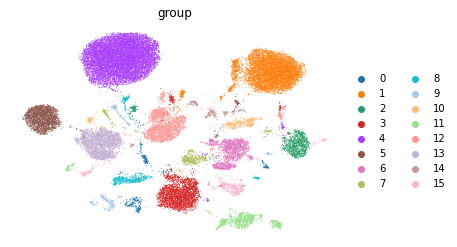

None


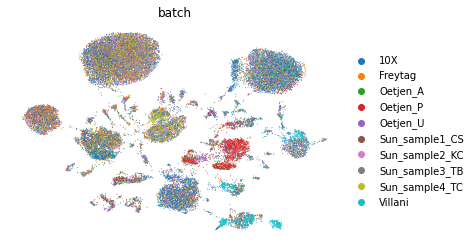

None
Computing NMI ...
Done !
NMI = 0.8078415727136278


In [10]:
#import model
#import model_wo_Dis as model# without Discriminator
#import model_wo_BC as model # without Batch Classiifer

#import model_scanvi_semisupervised as model
import model_scanvi as model

#import model_only_scanvi as model

run_config = tf.ConfigProto()

run_config.gpu_options.per_process_gpu_memory_fraction = 0.333
run_config.gpu_options.allow_growth = True

with tf.Session(config = run_config) as sess:

    dreamer = model.scDREAMER(
        sess,
        epoch = 300,
        dataset_name = data_path,
        batch = batch_key_dic[name],
        cell_type = cell_type_key_dic[name],
        name = name
        )

    dreamer.train_cluster()

    # 212 nan issue for human mouse 
